In [111]:
library(ggridges)
library(ggplot2)
library(dplyr)
library(zoo)

In [235]:
# Define the colour palette for visualizations
black <- '#080F0F'
blue <- '#A4BAB7'
yellow <- '#EFF2C0'
brown <- '#BEA57D'
red <- '#A52422'
turq <- '#25CED1'
coral <- '#FF8A5B'
pink <- '#EA526F'
green <- '#9BC53D'

In [287]:
basepath <- 'C:\\Users\\hanna\\Desktop\\Dissertation\\3_Analyzing\\Results\\'
cases <- c('tac', 'nep', 'pap','car', 'hed')
file <- '\\daily_users.csv'

In [288]:
for(case in cases){
    var <- paste0(case, '_data')
    data <- read.csv(paste0(basepath, case, file))
    data$Case <- case                         
    assign(var, data)
}

In [289]:
all <- rbind(car_data, tac_data, pap_data, nep_data, hed_data)
all <- all %>% mutate(Case = factor(Case, levels=c('hed','pap', 'car', 'tac','nep')))
all <- group_by(all, Case) %>% 
    mutate(percent = Unique/sum(Unique)*100)%>%
    mutate(avg = zoo::rollmean(Unique, k = 5, fill = NA))%>%
    mutate(Date = as.Date(Date))

head(all)

X,Date,Unique,Day,Case,percent,avg
1,2013-03-24,3,1,car,0.8356546,NA
2,2013-03-25,5,2,car,1.3927577,NA
3,2013-03-26,5,3,car,1.3927577,3.0
4,2013-03-29,1,4,car,0.2785515,2.8
5,2013-03-30,1,5,car,0.2785515,3.2
6,2013-04-01,2,6,car,0.5571031,2.4


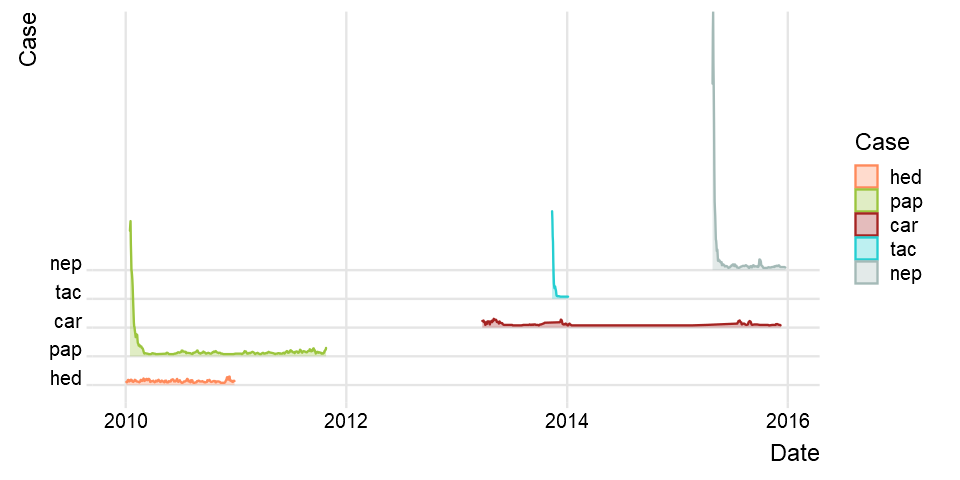

In [290]:
# Plot formatting
options(repr.plot.width=8, repr.plot.height=4)

# Make the plot 
ggplot(all, aes(Date, Case, height = avg, group = Case)) + 
  geom_density_ridges(stat = "identity", scale = 9, alpha=0.3, aes(fill=Case, col=Case))+
    theme_ridges()+
    scale_fill_manual(values = c(coral, green,red, turq, blue))+
    scale_color_manual(values = c(coral, green,red, turq, blue))

In [291]:
ggsave('Daily_users.png', height=4, width=8, units='in')

### Summary statistics for each case 

In [292]:
file <- '\\output_results.csv'

for(case in cases){
    var <- paste0(case, '_output')
    data <- read.csv(paste0(basepath, case, file))
    data$Case <- case                         
    assign(var, data)
    print(nrow(data))
}

all_output <- rbind(pap_output, tac_output, nep_output, car_output, hed_output)
all_output <- all_output %>% mutate(Duration = round(Duration), Area = round(Area), Per_maint = round(Per_maint, 2))

head(all_output)

[1] 1
[1] 1
[1] 1
[1] 1
[1] 1


X,Created,Contrib,Changesets,Modified_after,Per_maint,Burst,Style,Duration,Area,Case
1,31962,313,4364,15975,49.98,17.0000,event,658,1397,pap
1,19801,199,1144,1684,8.50,1.0000,event,82,356,tac
1,37493,880,5144,4259,11.36,5.0000,event,250,98,nep
1,36788,170,1394,5163,14.03,164.1875,mission,1012,203,car
1,9070,142,768,8100,89.31,339.8125,mission,365,192,hed


### Maintenance across cases

In [293]:
file <- '\\maint_time.csv'

for(case in cases){
    var <- paste0(case, '_maint')
    data <- read.csv(paste0(basepath, case, file))
    data$Case <- case                         
    assign(var, data)
    print(nrow(data))
}

all_maint <- rbind(pap_maint, tac_maint, nep_maint, car_maint, hed_maint)

[1] 5
[1] 5
[1] 5
[1] 5
[1] 5


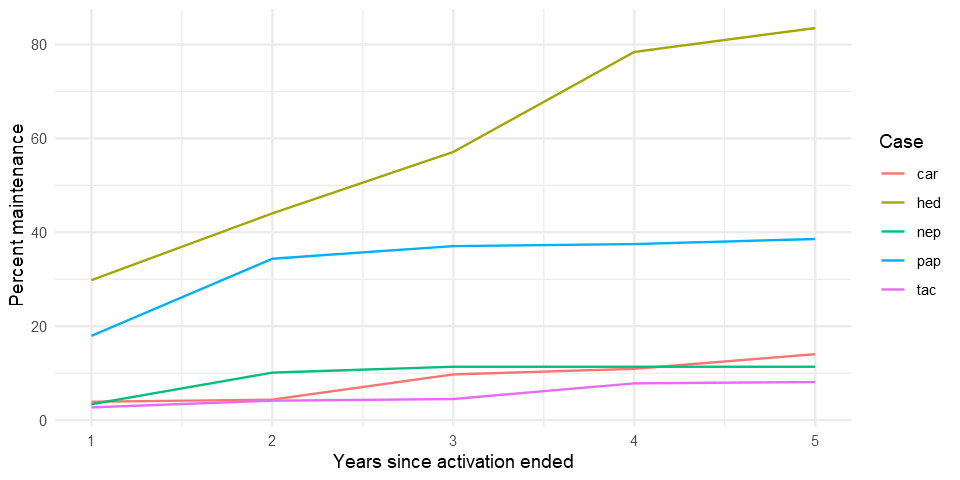

In [294]:
# Plot formatting
options(repr.plot.width=8, repr.plot.height=4)

ggplot(all_maint, aes(x=Years, y=Maint_per, group=Case, color=Case)) +
    geom_line()+
    theme_minimal()+
    labs(x='Years since activation ended', y='Percent maintenance')

In [295]:
ggsave('maintenance.png', height=4, width=8, units='in')